## Выбор места для бурения новой скважины

В нашем распоряжении имеются данные о пробах нефти в трех регионах. Известны три признака, определяющие качество нефти и объем ее запасов в каждом регионе: 

 - f0, f1, f2 - важдные признаки качества.
 - product - объем запасов в скважине.

Будет построена модель для определения региона, где добыча принесет наибольшую прибыль.

### 1. Загрузка и изучение данных

Загрузим данные

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
data_0 = pd.read_csv('geo_data_0.csv')
data_1 = pd.read_csv('geo_data_1.csv')
data_2 = pd.read_csv('geo_data_2.csv')

In [4]:
data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [6]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
data_0.shape

(100000, 5)

In [8]:
data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [9]:
data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [10]:
data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


Проверим данные на наличие дубликатов

In [11]:
data_0.duplicated().sum()

0

In [12]:
data_1.duplicated().sum()

0

In [13]:
data_2.duplicated().sum()

0

Пропусков нет, дубликатов нет.

In [14]:
data_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [15]:
data_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [16]:
data_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


Построим плотности распределений для каждого признака f0, f1, f2 по каждой локации.

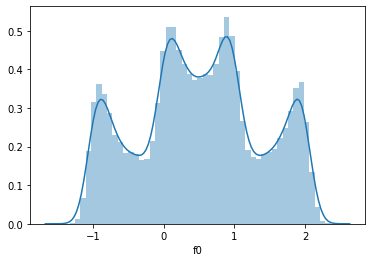

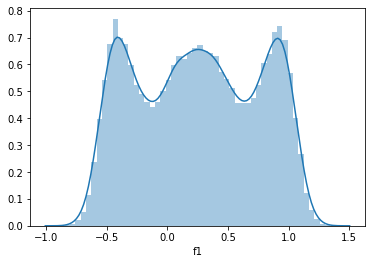

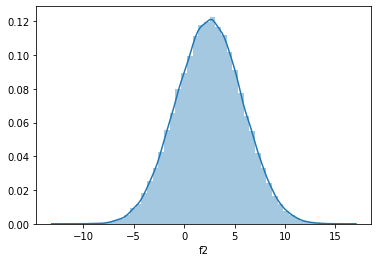

In [17]:
# data_0
columns=['f0', 'f1', 'f2']
for column in columns:
    sns.distplot(data_0[column])
    plt.show()

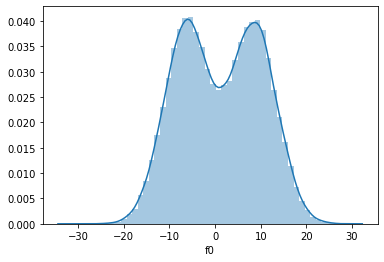

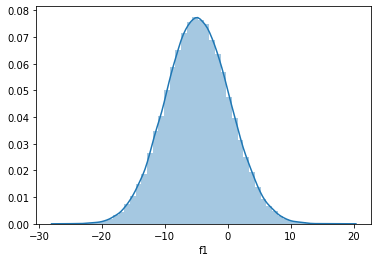

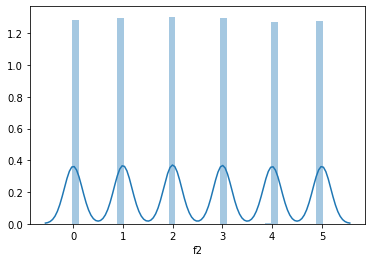

In [18]:
# data_1
for column in columns:
    sns.distplot(data_1[column])
    plt.show()

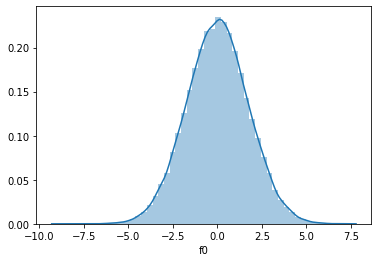

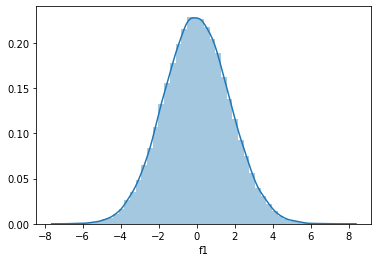

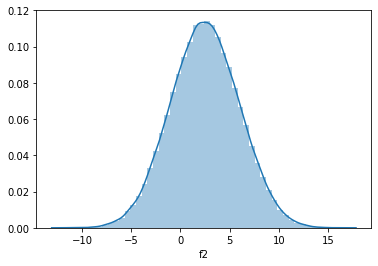

In [19]:
# data_2
for column in columns:
    sns.distplot(data_2[column])
    plt.show()

Посмотрим корреляции между величинами для каждого датасета

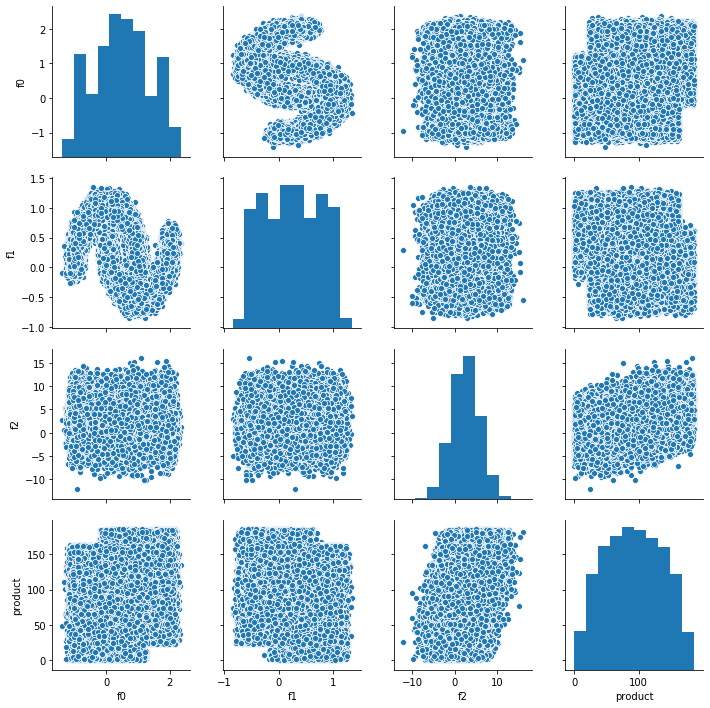

In [20]:
sns.pairplot(data_0)
plt.show()

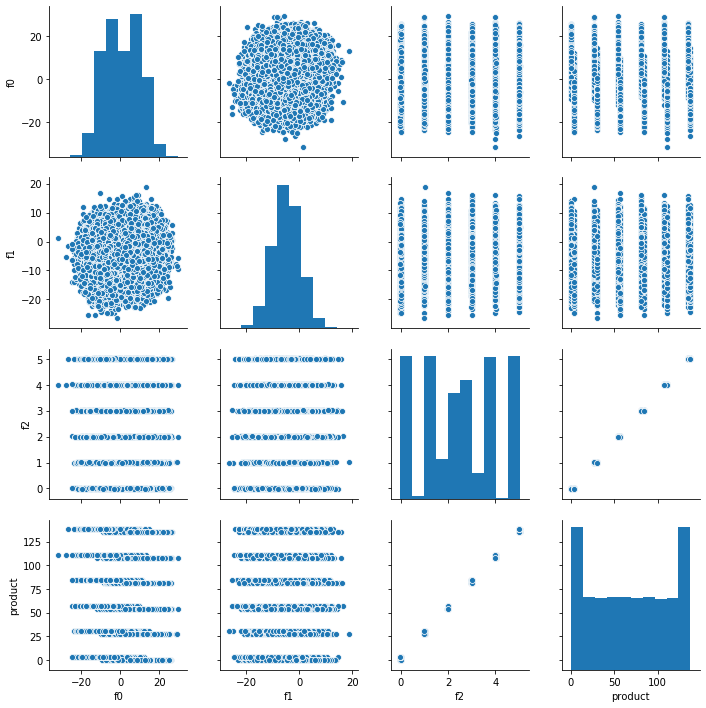

In [21]:
sns.pairplot(data_1)
plt.show()

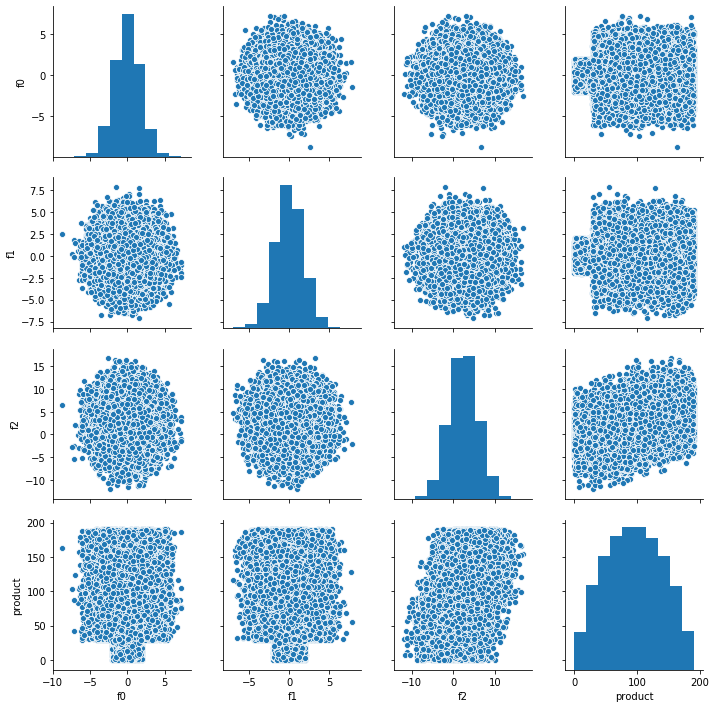

In [22]:
sns.pairplot(data_2)
plt.show()

Пострим таблицу корреляций для каждого датасета

In [23]:
count = 0
for i in [data_0, data_1, data_2]:
    print('data_' + str(count))
    print(i.corr())
    print()
    count += 1

data_0
               f0        f1        f2   product
f0       1.000000 -0.440723 -0.003153  0.143536
f1      -0.440723  1.000000  0.001724 -0.192356
f2      -0.003153  0.001724  1.000000  0.483663
product  0.143536 -0.192356  0.483663  1.000000

data_1
               f0        f1        f2   product
f0       1.000000  0.182287 -0.001777 -0.030491
f1       0.182287  1.000000 -0.002595 -0.010155
f2      -0.001777 -0.002595  1.000000  0.999397
product -0.030491 -0.010155  0.999397  1.000000

data_2
               f0        f1        f2   product
f0       1.000000  0.000528 -0.000448 -0.001987
f1       0.000528  1.000000  0.000779 -0.001012
f2      -0.000448  0.000779  1.000000  0.445871
product -0.001987 -0.001012  0.445871  1.000000



Наблюдается значимая линейная корреляция между параметром f2 и product в data_1. 

Из графиков видны нелинейные корреляции между f0 и f1 в data_0.

### 2. Обучение и проверка моделии для каждого региона

Уберем из исходных датасетов столбец id, который не влияет на обучение.

In [24]:
data_0_new, data_1_new, data_2_new = data_0.drop('id', axis=1), data_1.drop('id', axis=1), data_2.drop('id', axis=1)

Разобъем данные на обучающую и валидационную выборки

In [25]:
data_0_new_train, data_0_new_valid = train_test_split(data_0_new, test_size=0.25, random_state=1234)
data_1_new_train, data_1_new_valid = train_test_split(data_1_new, test_size=0.25, random_state=1234)
data_2_new_train, data_2_new_valid = train_test_split(data_2_new, test_size=0.25, random_state=1234)

Выделим признаки и целевой признак по каждому датасету

In [26]:
#обучающий датасет
features_train_0 = data_0_new_train.drop('product', axis=1)
target_train_0 = data_0_new_train['product']

features_train_1 = data_1_new_train.drop('product', axis=1)
target_train_1 = data_1_new_train['product']

features_train_2 = data_2_new_train.drop('product', axis=1)
target_train_2 = data_2_new_train['product']

#валидационный датасет
features_valid_0 = data_0_new_valid.drop('product', axis=1)
target_valid_0 = data_0_new_valid['product']

features_valid_1 = data_1_new_valid.drop('product', axis=1)
target_valid_1 = data_1_new_valid['product']

features_valid_2 = data_2_new_valid.drop('product', axis=1)
target_valid_2 = data_2_new_valid['product']

Обучим модель линейной регрессии для каждого региона

In [27]:
# model_0 = LinearRegression()
# model_0.fit(features_train_0, target_train_0)
model_0 = LinearRegression() 
model_1 = LinearRegression() 
model_2 = LinearRegression()

model_0.fit(features_train_0, target_train_0)
model_1.fit(features_train_1, target_train_1)
model_2.fit(features_train_2, target_train_2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
predictions_0 = model_0.predict(features_valid_0)
predictions_0 = pd.Series(predictions_0)

predictions_1 = model_1.predict(features_valid_1)
predictions_1 = pd.Series(predictions_1)

predictions_2 = model_2.predict(features_valid_2)
predictions_2 = pd.Series(predictions_2)


Добавим к валидационным данным местоположения №0 предсказания модели 

In [29]:
data_0_new_valid['predictions'] = predictions_0.values
data_1_new_valid['predictions'] = predictions_1.values
data_2_new_valid['predictions'] = predictions_2.values

Создадим новые датасеты с истинными и предсказанными значениями product на валидационной выборке для местоположения №0

In [30]:
true_pred_0 = pd.DataFrame(data_0_new_valid[['product', 'predictions']])
true_pred_1 = pd.DataFrame(data_1_new_valid[['product', 'predictions']])
true_pred_2 = pd.DataFrame(data_2_new_valid[['product', 'predictions']])

Рассчитаем RMSE модели и средний запас предсказанного сырья для каждого месторождения

In [31]:
mse_0 = mean_squared_error(target_valid_0, predictions_0)
mse_1 = mean_squared_error(target_valid_1, predictions_1)
mse_2 = mean_squared_error(target_valid_2, predictions_2)

mse = [mse_0, mse_1, mse_2]
predictions = [predictions_0, predictions_1, predictions_2]

count = 0
for i in mse:
    rmse = i ** 0.5
    print(f'RMSE № {count} = {rmse}')
    print(f'Среднеий запас предсказанного сырья для места №{count} = {predictions[count].mean()}')
    print()
    count += 1

RMSE № 0 = 37.56239418363779
Среднеий запас предсказанного сырья для места №0 = 92.43045952558435

RMSE № 1 = 0.8939344738117649
Среднеий запас предсказанного сырья для места №1 = 68.8024824979837

RMSE № 2 = 40.10318099258418
Среднеий запас предсказанного сырья для места №2 = 94.91573817913492



### Вывод

На данном этапе были построены модели предсказаний запасов сырья в трех регионах. В регионе №0 и №2 запасов сырья больше, чем в регионе №1. Но в регионе №1 значение RMSE сильно меньше, чем в остальных. Модель для этого региона работает значительно лучше.

### 3. Подготовка к расчету прибыли

In [32]:
PROFIT_PER_PRODUCT = 450000 # доход с каждой единицы продукта
REGION_BUDGET = 10**10 # бюджет на разработку скважин в регионе
ALL_POINTS = 500 # количество точек при разведке региона
PROFIT_POINTS = 200 # потенциально прибыльные точки
LOSS_PROBABILITY = 0.025 # вероятность убытков

Расчет достаточного объема сырья для безубыточной разработки новой скважины.

Выберем по 200 самых доходных скважин из каждого региона по предсказанным значениям и посчитаем суммарный объем добычи.


In [33]:
value_top_200_0 = true_pred_0['predictions'].sort_values(ascending=False)
value_top_200_1 = true_pred_1['predictions'].sort_values(ascending=False)
value_top_200_2 = true_pred_2['predictions'].sort_values(ascending=False)

In [34]:
value_top_200_0_sum = value_top_200_0.loc[:200].sum()
value_top_200_1_sum = value_top_200_1.loc[:200].sum()
value_top_200_2_sum = value_top_200_2.loc[:200].sum()
print('Запас сырья в 200 скважинах, отсоритированных по убыванию количества в каждой')
print('№0', value_top_200_0_sum)
print('№1', value_top_200_1_sum)
print('№2', value_top_200_2_sum)

Запас сырья в 200 скважинах, отсоритированных по убыванию количества в каждой
№0 811630.2526577621
№1 1552515.2467442756
№2 1612091.7971105396


Рассчитаем прибыль с каждого месторождения

In [35]:
print('Прибыль в регионе №0 =', value_top_200_0_sum * PROFIT_PER_PRODUCT - REGION_BUDGET, 'р.')
print('Прибыль в регионе №1 =', value_top_200_1_sum * PROFIT_PER_PRODUCT - REGION_BUDGET, 'р.')
print('Прибыль в регионе №2 =', value_top_200_2_sum * PROFIT_PER_PRODUCT - REGION_BUDGET, 'р.')

Прибыль в регионе №0 = 355233613695.993 р.
Прибыль в регионе №1 = 688631861034.924 р.
Прибыль в регионе №2 = 715441308699.7428 р.


Рассчитаем средний объем сырья для 200 вышек в каждой из локаций

In [36]:
print('№0', value_top_200_0.loc[:200].mean())
print('№1', value_top_200_1.loc[:200].mean())
print('№2', value_top_200_2.loc[:200].mean())

№0 120.77831140740527
№1 97.59336476893829
№2 107.8755217552549


Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины

In [37]:
SUFFICIENT_VOLUME = REGION_BUDGET / (PROFIT_POINTS * PROFIT_PER_PRODUCT)
SUFFICIENT_VOLUME

111.11111111111111

Сравнивая полученное значение 111 сырья со средним объемом для каждого места, можно сказать, что на данный момент безубыточным выглядит месторождение №0 (средний запас сырья 121).  

### Вывод

Достаточным запасом сырья для безубыточной разработки обладает только месторождение №0. 

### 4. Функция для расчёта прибыли по выбранным скважинам и предсказаниям модели

Скважина с максимальными значениями предсказаний (№0 120.77831140740527). 

Напишем функцию прибыли по выбранным скважинам и предсказаниям модели

In [38]:
def revenue(target, predict):
    target = target.reset_index(drop=True)
    predict = predict.reset_index(drop=True)
    sorted_predict = predict.sort_values(ascending=False).index
    sorted_target = target[sorted_predict][:PROFIT_POINTS]
    return sorted_target.sum()* PROFIT_PER_PRODUCT - REGION_BUDGET

Посмотрим прибыль для каждого месторождения

In [39]:
print(revenue(target_valid_0, predictions_0))
print(revenue(target_valid_1, predictions_1))
print(revenue(target_valid_2, predictions_2))

3424026320.2475376
2415086696.681511
2554955424.433958


### 5. Расчет рисков и прибыли для каждого региона

Напишем функцию для рассчета прибыли и 95% доверительного интервала с применением метода bootstrap.

In [40]:
state = np.random.RandomState(12345)

def profit(target, predictions):
    
    values = []
    values_for_interval = []
    
    for i in range(1000):
        target = target.reset_index(drop=True)
        target_subsample = target.sample(n=500, replace=True, random_state=state) # выборка из 500 скважин
        probs_subsample = predictions[target_subsample.index]
        rev = revenue(target_subsample, probs_subsample)
        values.append(rev)
        values_for_interval.append(target_subsample.quantile(0.5))  
        
    values = pd.Series(values)
    values_for_interval = pd.Series(values_for_interval)
    
    quantile_mean = values_for_interval.quantile(0.5)
    
    # границы доверительного интервала
    lower = values.quantile(0.025) 
    upper = values.quantile(0.975)
    
                                 
    return values, lower, upper



Посчитаем доверительный интервал для каждого региона

In [41]:
income_0, lower_0, upper_0 = profit(target_valid_0, predictions_0) # Series из 1000 выборок по 500 случайных значений в каждой
                                                                   # (суммарный доход каждой из 500) + доверительный интервал
print('Доверительный интервал для месторождения №0: ', lower_0, ' ', upper_0)

income_1, lower_1, upper_1 = profit(target_valid_1, predictions_1)
print('Доверительный интервал для месторождения №1: ', lower_1, ' ', upper_1)

income_2, lower_2, upper_2 = profit(target_valid_2, predictions_2)
print('Доверительный интервал для месторождения №2: ', lower_2, ' ', upper_2)

Доверительный интервал для месторождения №0:  -164571176.73689052   872439511.1968266
Доверительный интервал для месторождения №1:  26000435.376237825   803754924.0593178
Доверительный интервал для месторождения №2:  -172939832.28213713   889155967.3071864


Построим распределения получившихся средних прибылей

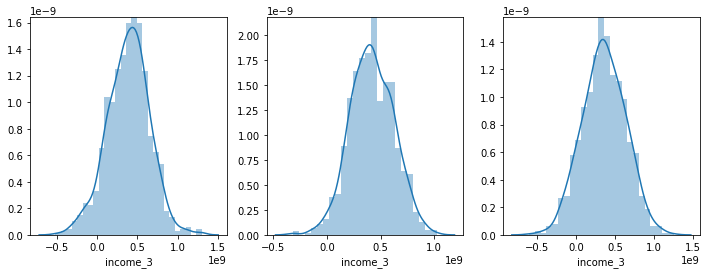

In [75]:
incomes = [income_0, income_1, income_2]
# axes = [ax1, ax2, ax3]

fig = plt.figure(figsize=(12, 4))

counter = 1
for income in incomes:
    ax = fig.add_subplot(1, 3, counter)
    sns.distplot(income, ax=ax)
    xlabel = 'income_' + str(count)
    plt.xlabel(xlabel)
    counter += 1

Найдем среднюю прибыль для каждого региона

In [42]:
# средняя прибыль каждого месторождения

print('Средняя прибыль месторождения №0:', income_0.mean())
print('Средняя прибыль месторождения №1:', income_1.mean())
print('Средняя прибыль месторождения №2:', income_2.mean())
    

Средняя прибыль месторождения №0: 387469759.7257029
Средняя прибыль месторождения №1: 419143064.3759363
Средняя прибыль месторождения №2: 354739173.1398923


Вычислим риски по каждому региону

In [43]:
def risks(income):
    return income[income < 0].count() / 1000 # доля сквжин с отрицательной прибылью
    

In [44]:
print('Максимальное значение риска:', LOSS_PROBABILITY * 100, '%\n')

print('Риск для месторождения №0:', risks(income_0) * 100, '%')
print('Риск для месторождения №1:', risks(income_1) * 100, '%')
print('Риск для месторождения №2:', risks(income_2) * 100, '%')

Максимальное значение риска: 2.5 %

Риск для месторождения №0: 6.9 %
Риск для месторождения №1: 1.7999999999999998 %
Риск для месторождения №2: 10.6 %


### Вывод

В данной работе было проведено исследование трех месторождений нефти. Были выбраны по 200 наиболее прибыльных скважины из каждого месторождения. Были посчитаны суммарные прибыли всех трех месторождений, оценены риски убыточных месторождений, определен 95%-й доверительный интервал для каждого среднего значения полученной прибыли.

В результате исследований можно рекомендовать для разработки месторождение №1, т.к.:
 - риски убыточности для него сотавляют 1.8% (по условию задачи должно быть не более 2.5%);
 - у него максимальная средняя прибыль среди всех локаций;
 - для него с вероятностью 95% можно утверждать, что средняя прибыль будет положительной.

